# Jurnal Modul 3

## Melakukan Import Library

In [121]:
import matplotlib.pyplot as plt
import numpy as np

Code diatas ini berfungsi untuk mengimport library dari matplotlib.pyplot dan numpy. Untuk masing-masing library diberikan as atau alias yaitu plt untuk matplotlib.pyplot dan np untuk numpy. Pemberian as atau alias ini berguna untuk mempersingkat baris code ketika memanggil library yang diinginkan dan menginisialisasi variabel yang digunakan dalam program.

## Menampilkan Citra Asli

Code dibawah ini membaca data dari sebuah citra dengan menggunakan `imread()` yang berasal dari library matplotlib.pyplot, kemudian citra yang diambil yaitu `IoriYagami.jpg` dan diberikan sebuah nama yaitu foto. Setelah citra atau gambar tersebut dibaca, selanjutnya citra akan ditampilkan dengan menggunakan `imshow()` yang berasal juga dari library matplotlib.pyplot. Untuk `axis()` berfungsi menghilangkan sumbu x dan y.

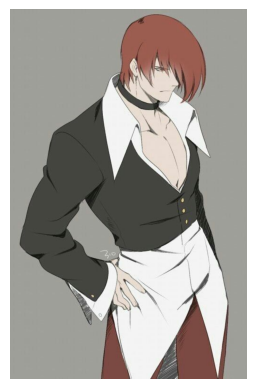

In [122]:
foto = plt.imread("IoriYagami.jpg")
plt.imshow(foto)
plt.axis("off")
plt.show()

## Menampilkan Citra Skala Abu-Abu

In [123]:
def bgr2gray(img):
    tinggi, lebar = img.shape[:2]
    grayImg = np.zeros((tinggi, lebar)).astype(np.uint8)
    for i in range(tinggi):
        for j in range(lebar):
            grayImg[i,j] = int(0.2989*img[i][j][0] + 0.5870*img[i][j][1] + 0.1140*img[i][j][2])
            
    return grayImg

Code di atas memiliki sebuah method atau function bernama `rgb2gray` dengan parameter `img`. Method ini berfungsi untuk mengubah gambar berwarna (BGR) menjadi gambar grayscale (skala abu-abu). pertama akan membuat array baru `grayImg` dengan dimensi yang sama dengan gambar BGR (tinggi, lebar). Array ini akan menampung nilai grayscale untuk setiap piksel. Kemudian akan mengiterasi melalui setiap piksel dalam gambar BGR serta untuk setiap piksel, nilai kecerahannya dihitung menggunakan rumus `grayscale = 0.2989 * R + 0.5870 * G + 0.1140 * B` dan hasilnya akan diubah menjadi `int` atau bilangan bulat. Setelah menyelesaikan iterasi melalui semua piksel, fungsi mengembalikan array `grayImg` yang berisi gambar grayscale yang dihasilkan.

Code di bawah berfungsi untuk menampilkan gambar grayscale (skala abu-abu) dari gambar BGR (biru, hijau, merah) yang telah dikonversi sebelumnya. Gambar akan ditampilkan menggunakan library dari matplotlib yaitu `imshow()` yang diisi dengan variabel `grayImg` dan tidak lupa memberikan warna pada map yaitu dengan cara `cmap="gray"` agar citra tetap berada pada skala keabuan.

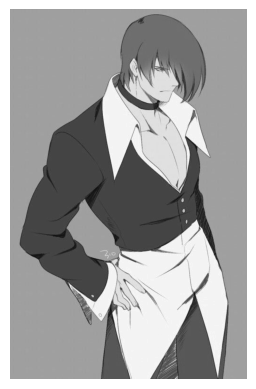

In [124]:
grayImg = bgr2gray(foto)
plt.imshow(grayImg, cmap="gray")
plt.axis("off")
plt.show()

## Dekomposisi CItra

In [125]:
class Dekomposisi:
	def __init__ (self, image, loK, hiK):
		self.image = image
		self.loK = loK
		self.hiK = hiK

	def filter(self, image, kernel):
		HtoInt = int((kernel.shape[0] - 1)/2)  
		WtoInt = int((kernel.shape[1] - 1)/2) 
		rightPadd = kernel.shape[1]-WtoInt
		downPadd = kernel.shape[0]-HtoInt
		result = np.zeros(image.shape)
		img = np.pad(image, ((WtoInt, rightPadd), (HtoInt, downPadd)), mode='edge')
		for i in range(result.shape[0]):
			for j in range(result.shape[1]):
				pixel = 0
				for k in range(kernel.shape[0]):
					for l in range(kernel.shape[1]):
						pixel += img[i+k, j+l] * kernel[k, l]
				result[i, j] = pixel
		return result

	def Proses(self):
		H = self.filter(self.image, self.hiK )
		L = self.filter(self.image, self.loK )
		HDS = H[::2, ::]
		LDS = L[::2, ::]
		HH = self.filter(HDS, np.transpose(self.hiK))
		HL = self.filter(HDS, np.transpose(self.loK))
		LH = self.filter(LDS, np.transpose(self.hiK))
		LL = self.filter(LDS, np.transpose(self.loK))
		self.HHDS = HH[::, ::2]
		self.HLDS = HL[::, ::2]
		self.LHDS = LH[::, ::2]
		self.LLDS = LL[::, ::2]
		self.HHDS = self.normalisasi(self.HHDS)
		self.HLDS = self.normalisasi(self.HLDS)
		self.LHDS = self.normalisasi(self.LHDS)
		self.LLDS = self.normalisasi(self.LLDS)
		list = [self.LLDS, self.HLDS, self.LHDS, self.HHDS]
		return list

	def normalisasi(self, image):
		image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
		return image


Code di atas berfungsi untuk melakukan `dekomposisi wavelet` pada citra grayscale. Membuat sebuah kelas baru yang bernama `Dekomposisi` dan didalamnya terdapat beberapa method atau function. Terdapat method `__init__` yang berfungsi untuk meminisiasi objek Dekomposisi baru. Kemudian terdapat method `filter` yang berfungsi untuk melakukan filtering konvolusi pada gambar menggunakan kernel yang ditentukan. Selanjutnya terdapat method `Proses` yang berfungsi untuk melakukan langkah-langkah inti dekomposisi wavelet pada gambar input. Pada fungsi ini ada beberapa tahapan yang dikerjakan yaitu `Filtering dengan Kernel High dan Low`, `Downsampling`, dan `Filtering Rekursif`.

## Menggabungkan Citra

In [126]:
def merge(img, img2, img3, img4):
    horiResult1 = np.zeros([img.shape[0], img.shape[1] + img2.shape[1]])
    for i in range(horiResult1.shape[0]):
        for j in range(horiResult1.shape[1]):
            if(j < img.shape[1]):
                horiResult1[i][j] = img[i][j]
            else:
                horiResult1[i][j] = img2[i][j - img.shape[1]]

    horiResult2 = np.zeros([img3.shape[0], img3.shape[1] + img4.shape[1]])
    for i in range(horiResult2.shape[0]):
        for j in range(horiResult2.shape[1]):
            if(j < img3.shape[1]):
                horiResult2[i][j] = img3[i][j]
            else:
                horiResult2[i][j] = img4[i][j - img3.shape[1]]

    hasil=np.zeros([horiResult1.shape[0] + horiResult2.shape[0], horiResult1.shape[1]])
    for i in range(hasil.shape[0]):
        for j in range(hasil.shape[1]):
            if(i < horiResult1.shape[0]):
                hasil[i][j] = horiResult1[i][j]
            else:
                hasil[i][j] = horiResult2[i - horiResult1.shape[0]][j]
    return hasil

Code di atas berfungsi untuk menggabungkan empat gambar menjadi satu gambar gabungan. Pertama, kode ini menggabungkan dua gambar secara horizontal (menyampingkan) menjadi `horiResult1` dan dua gambar lainnya menjadi `horiResult2`. Kemudian, `horiResult1` dan `horiResult2` digabungkan secara vertikal (ditumpuk) menjadi gambar akhir hasil.

Code di bawah akan mendefinisikan kernel, melakukan dekomposisi, dan menampilkan hasil. Pertama akan mendefinisikan kernel filter low-pass `lowKernel` dan high-pass `highKernel` yang digunakan untuk dekomposisi wavelet.
Koefisien kernel tertentu `[0.5, 0.5] untuk low-pass` dan `[-0.5, 0.5] untuk high-pass` umumnya digunakan untuk transformasi wavelet. Kemudian sebuah instance dari class Dekomposisi dibuat `dkmp1`, menyediakan gambar grayscale (grayImg), kernel low-pass (lowKernel), dan kernel high-pass (highKernel). Method `proses` kemungkinan menerapkan langkah-langkah yang dijelaskan dalam jawaban sebelumnya (filtering, downsampling, filtering rekursif, dll.) untuk menghasilkan subband yang mewakili komponen frekuensi yang berbeda. Terakhir akan menampilkan hasil dekomposisi menggunakan library myplotlib.pyplot dengan urutan `Approximation`, `Horizontal Details`, `Vertikal Detail`, `Diagonal Detail`, dan `Result`.

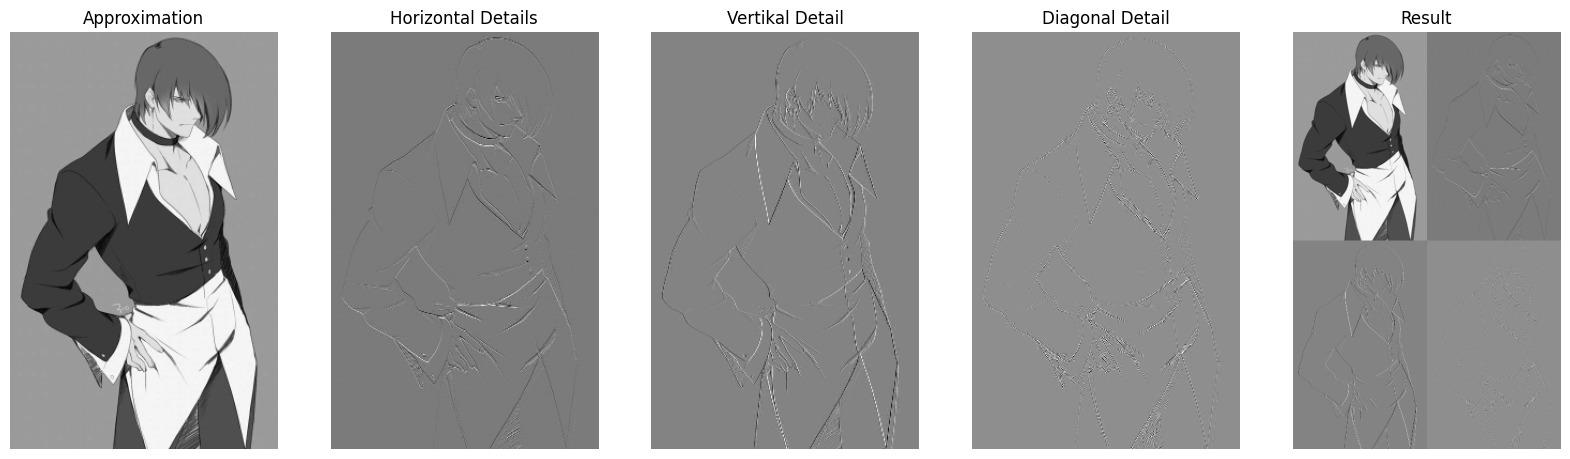

In [127]:
lowKernel = np.array([[0.5],[0.5]])
highKernel = np.array([[-0.5],[0.5]])
dkmp1 = Dekomposisi(grayImg, lowKernel, highKernel)
dkmp1.Proses()

hasilDkmp1 = merge(dkmp1.LLDS, dkmp1.HLDS, dkmp1.LHDS, dkmp1.HHDS)

plt.figure(figsize=(20,20))
plt.subplot(1,5,1)
plt.title('Approximation')
plt.imshow(dkmp1.LLDS, cmap="gray")
plt.axis("off")
plt.subplot(1,5,2)
plt.title('Horizontal Details')
plt.imshow(dkmp1.HLDS, cmap="gray")
plt.axis("off")
plt.subplot(1,5,3)
plt.title('Vertikal Detail')
plt.imshow(dkmp1.LHDS, cmap="gray")
plt.axis("off")
plt.subplot(1,5,4)
plt.title('Diagonal Detail')
plt.axis("off")
plt.imshow(dkmp1.HHDS, cmap="gray")
plt.subplot(1,5,5)
plt.axis("off")
plt.title('Result')
plt.imshow(hasilDkmp1, cmap="gray")
plt.axis("off")
plt.show()

## Dekomposisi Dinamis Berdasarkan Level

In [128]:
def dinamisDkmp(level, loK, hiK, image):
    listDkmp = []
    for i in range(level):
        if i == 0:
            dkmp = Dekomposisi(image, loK, hiK)
            dkmp.Proses()
            listDkmp.append(dkmp)
        else:
            dkmp = Dekomposisi(listDkmp[i-1].LLDS, loK, hiK)
            dkmp.Proses()
            listDkmp.append(dkmp)
    
    dkmpResult = merge(listDkmp[-1].LLDS, listDkmp[-1].HLDS, listDkmp[-1].LHDS, listDkmp[-1].HHDS)
    for element in listDkmp[-2::-1]:
        tempDkmp = dkmpResult
        tinggi, lebar = element.LLDS.shape
        dkmpResult = merge(tempDkmp[:tinggi,:lebar], element.HLDS, element.LHDS, element.HHDS)
    
    return dkmpResult

Code di atas berfungsi untuk melakukan dekomposisi wavelet secara dinamis hingga berada pada level tertentu. Hasil dekomposisi berupa subband-subband frekuensi, dan fungsi ini juga melakukan rekonstruksi gambar dari subband tersebut. Terdapat beberapa tahapan yang dilakukan yaitu `Inisialisasi daftar objek Dekomposisi`, `Looping untuk Dekomposisi Level`, `Penggabungan Subband Level Terakhir`, `Rekonstruksi dari Level Terakhir ke Level Awal` dan `Pengembalian Hasil`.

Code di bawah berfungsi untuk menampilkan hasil dekomposisi secara dinamis hingga berada pada level tertentu. Melakukan dekomposisi wavelet 4 level pada gambar grayscale dan kemudian memvisualisasikan gambar yang direkonstruksi setelah proses dekomposisi. Ini berguna untuk menganalisis konten frekuensi gambar di seluruh level detail berbeda yang ditangkap oleh dekomposisi wavelet.

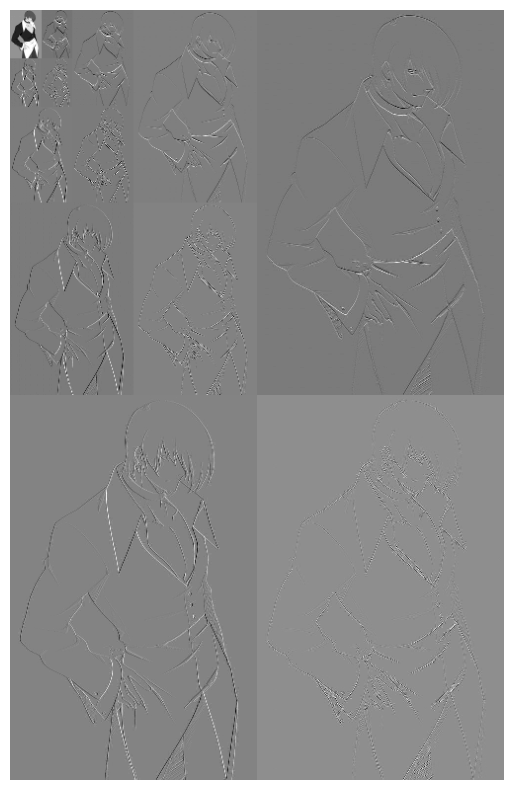

In [129]:
dkmp4Level = dinamisDkmp(4, lowKernel, highKernel, grayImg)
plt.figure(figsize=(10,10))
plt.imshow(dkmp4Level, cmap="gray")
plt.axis("off")
plt.show()

## Melakukan Rekonstruksi Citra yang Telah di Dekomposisi

In [130]:
class rekonstruksi:
    def __init__ (self, loK, hiK, HH, HL, LH,LL):
        self.loK = loK
        self.hiK = hiK
        self.HH =HH
        self.HL =HL
        self.LL =LL
        self.LH =LH
    
    def filter(self, image, kernel):
        img = image
        HtoInt = int((kernel.shape[0] - 1)/2)
        WtoInt = int((kernel.shape[1] - 1)/2)
        PaddingKanan = kernel.shape[1]-WtoInt
        PaddingBawah = kernel.shape[0]-HtoInt
        result = np.zeros(img.shape)
        img = np.pad(img, ((WtoInt, PaddingKanan), (HtoInt, PaddingBawah)),mode='edge')
        for i in range(result.shape[0]):
            for j in range(result.shape[1]):
                pixel = 0
                for k in range(kernel.shape[0]):
                    for l in range(kernel.shape[1]):
                        pixel += img[i+k, j+l] * kernel[k, l]
                result[i, j] = pixel
        return result
    
    def upscaleRow(self, img):
        hasil = np.zeros([img.shape[0]*2,img.shape[1]])
        hasil[::2,::]=img
        return np.array(hasil, dtype='int')
    
    def upscaleCol(self, img):
        hasil = np.zeros([img.shape[0],img.shape[1]*2])
        hasil[::,::2]=img
        return np.array(hasil, dtype='int')
    
    def proses(self):
        upLL = self.upscaleCol(self.LL)
        upLH = self.upscaleCol(self.LH)
        upHL = self.upscaleCol(self.HL)
        upHH = self.upscaleCol(self.HH)
        filterUpLL = self.filter(upLL,np.transpose(self.loK))
        filterUpLH = self.filter(upLH,np.transpose(self.hiK))
        filterUpHL = self.filter(upHL,np.transpose(self.loK))
        filterUpHH = self.filter(upHH,np.transpose(self.hiK))
        MixLow = filterUpLL+filterUpLH
        MixHigh = filterUpHL+filterUpHH
        USMixLow = self.upscaleRow(MixLow)
        USMixHigh = self.upscaleRow(MixHigh)
        FUSMixLow = self.filter(USMixLow,self.loK)
        FUSMixHigh = self.filter(USMixHigh,self.hiK)
        Hasil = FUSMixHigh + FUSMixLow
        return Hasil

Code di atas akan membuat sebuah kelas `rekonstruksi` dan pada kelas ini menyediakan fungsi-fungsi yang diperlukan untuk melakukan rekonstruksi gambar setelah dekomposisi wavelet. Ini dilakukan dengan menggabungkan dan memproses subband yang dihasilkan dari dekomposisi menggunakan upsampling, filtering, dan penggabungan. Fungsi `__init__` berfungsi untuk meminisiasi objek rekonstruksi baru. Fungsi `filter` berfungsi untuk melakukan filtering konvolusi pada gambar menggunakan kernel yang ditentukan. fungsi `upscaleRow` berfungsi untuk melakukan upsampling baris pada gambar. Fungsi `upscaleCol` berfungsi untuk melakukan upsampling kolom pada gambar. Fungsi `proses` berfungsi untuk melakukan rekonstruksi gambar.

Code di bawah akan melakukan rekonstruksi gambar grayscale (grayImg) menggunakan subband dengan class `rekonstruksi` yang dihasilkan dari dekomposisi wavelet dan menampilkan hasilnya dibandingkan dengan gambar asli. Hal ini membantu dalam memahami efek dekomposisi wavelet dan proses rekonstruksi pada konten frekuensi gambar.

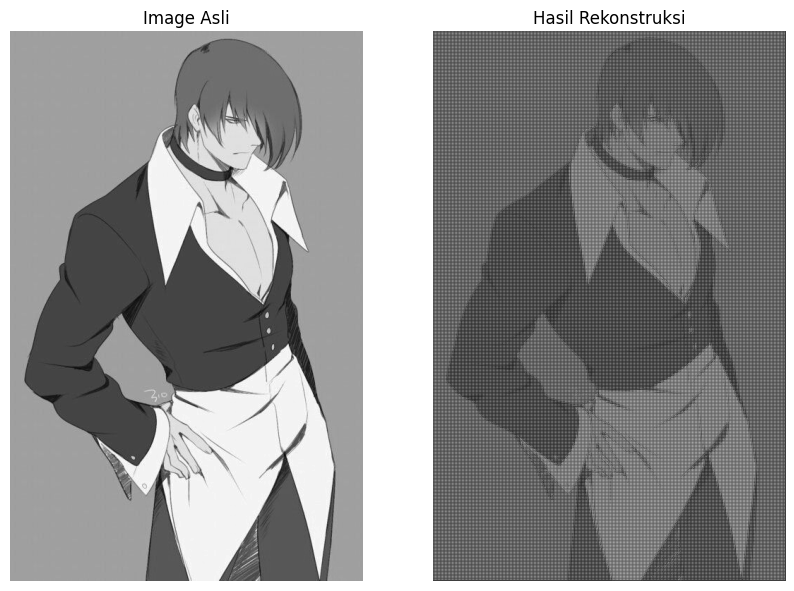

In [131]:
hasilRekon = rekonstruksi(lowKernel, highKernel, dkmp1.HHDS, dkmp1.HLDS, dkmp1.LHDS, dkmp1.LLDS).proses()

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title('Image Asli')
plt.imshow(grayImg, cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title('Hasil Rekonstruksi')
plt.imshow(hasilRekon, cmap="gray")
plt.axis("off")
plt.show()

## Melakukan Rekonstruksi CItra pada Level Dekomposisi Tertentu

Code di bawah dapat melakukan dekomposisi lebih lanjut pada seluruh gambar yang direkonstruksi atau subband frekuensi tertentu di dalamnya. Ini memungkinkan analisis yang lebih rinci dari komponen frekuensi gambar di seluruh level dekomposisi. Urutan hasil rekonstruksi yaitu `Approximation`, `Horizontal Detail`, `Vertical Detail`, dan `Diagonal Detail`.

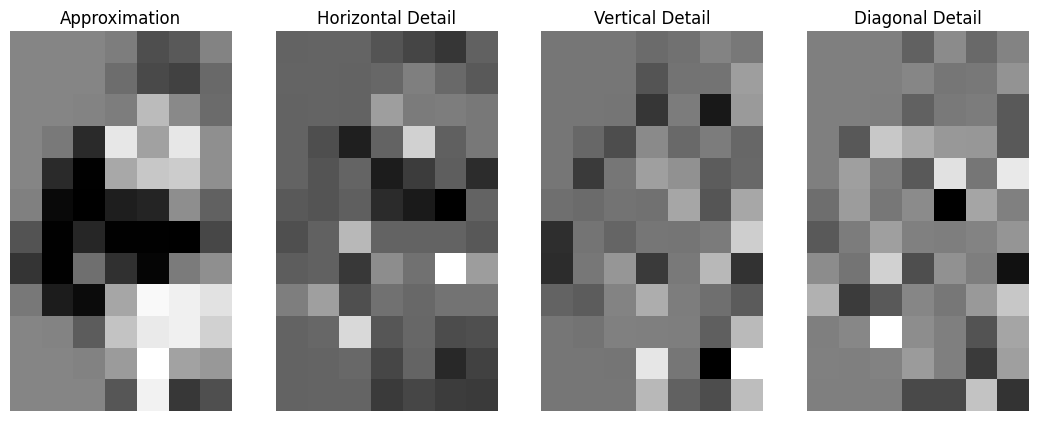

In [132]:
dkmp5 = Dekomposisi(dkmp4Level,lowKernel,highKernel)
dkmp5.Proses()

dkmp6 = Dekomposisi(dkmp5.LLDS,lowKernel,highKernel)
dkmp6.Proses()

plt.figure(figsize=(20,20))
plt.subplot(1,6,1)
plt.title('Approximation')
plt.imshow(dkmp6.LLDS[:12, :7], cmap="gray")
plt.axis("off")
plt.subplot(1,6,2)
plt.title('Horizontal Detail')
plt.imshow(dkmp6.HLDS[:12, :7], cmap="gray")
plt.axis("off")
plt.axis("off")
plt.subplot(1,6,3)
plt.title('Vertical Detail')
plt.imshow(dkmp6.LHDS[:12, :7], cmap="gray")
plt.axis("off")
plt.subplot(1,6,4)
plt.title('Diagonal Detail')
plt.imshow(dkmp6.HHDS[:12, :7], cmap="gray")
plt.axis("off")
plt.show()

## Menampilkan Line Signal dari Citra yang telah di Rekonstruksi

In [133]:
def lineSignal(image):
    line = np.zeros((image.shape[0]*image.shape[1]))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            line[i*image.shape[1]+j] = image[i][j]

    return line

Code di atas membuat method `lineSignal` yang berfungsi untuk mengambil gambar sebagai input dan mengembalikan representasi linier dari gambar tersebut. Tahapan proses yang terjadi di fungsi ini yaitu `Inisialisasi Array Linear`, `Mengubah Gambar menjadi Linier`, dan `Mengembalikan Representasi Linier`. Fungsi ini juga berguna untuk mengubah gambar 2D menjadi representasi linier 1D.

Code di bawah berfungsi untuk mengambil subband yang diperoleh dari dekomposisi wavelet level 6 (dkmp6) dan memvisualisasikannya sebagai sinyal linier. Masing-masing subband `LLDS, HLDS, LHDS, dan HHDS` dari dkmp6 diambil dengan slicing ([:12, :7]) untuk menyesuaikan dengan contoh (hanya menampilkan sebagian kecil subband). Kemudian terdapat Fungsi `plt.plot` yang digunakan untuk memplot sinyal linier yang disimpan dalam `HHsignal, HLsignal, LHsignal, dan LLsignal`.

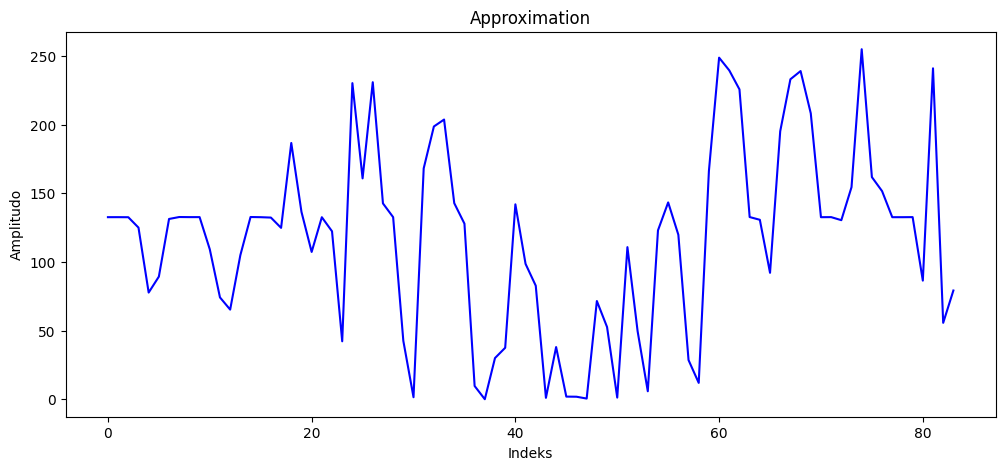

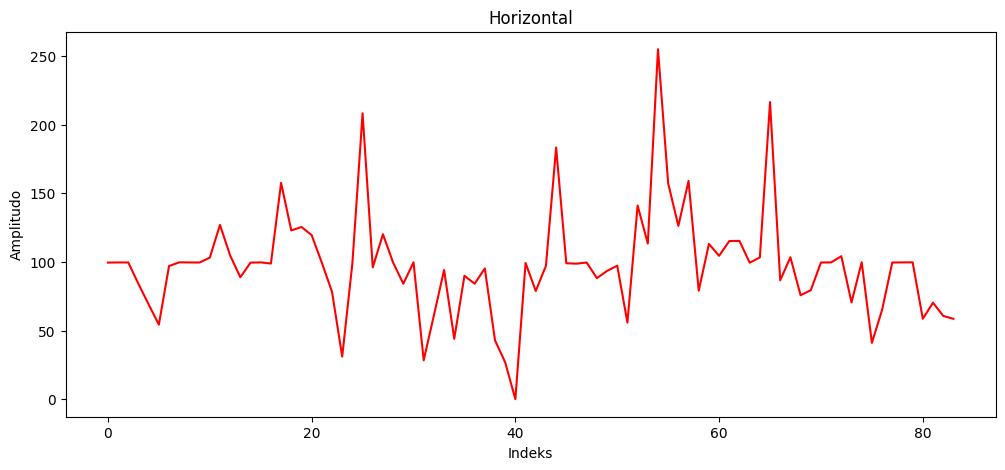

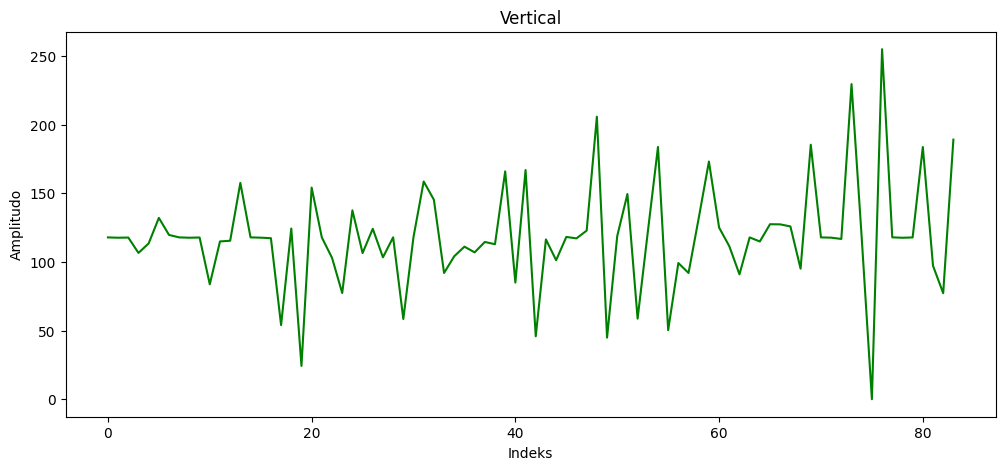

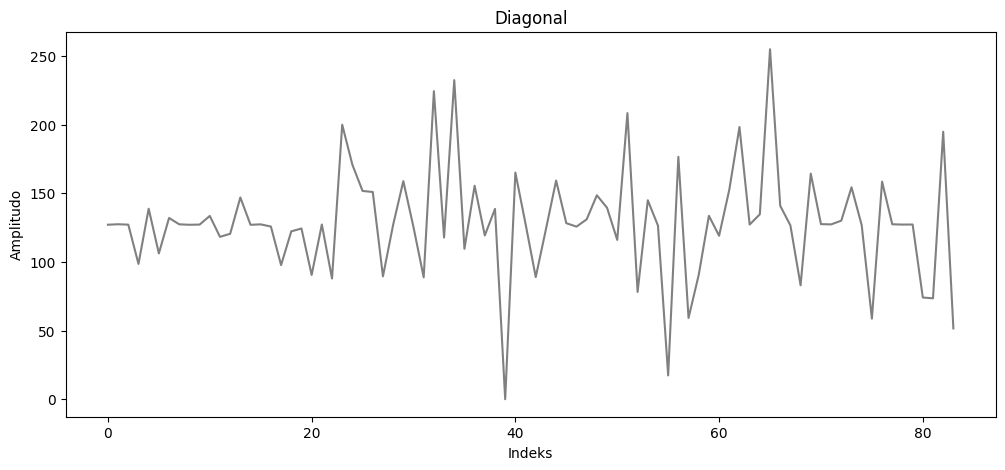

In [134]:

HHsignal = lineSignal(dkmp6.LLDS[:12, :7])
HLsignal = lineSignal(dkmp6.HLDS[:12, :7])
LHsignal = lineSignal(dkmp6.LHDS[:12, :7])
LLsignal = lineSignal(dkmp6.HHDS[:12, :7])

plt.figure(figsize=(12,5))
plt.plot(HHsignal, color='blue')
plt.title('Approximation')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(HLsignal, color='red')
plt.title('Horizontal')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(LHsignal, color='green')
plt.title('Vertical')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()

plt.figure(figsize=(12,5))
plt.plot(LLsignal, color='gray')
plt.title('Diagonal')
plt.xlabel('Indeks')
plt.ylabel('Amplitudo')
plt.show()